<a href="https://colab.research.google.com/github/benpardede/StatsfrBusiness/blob/main/Statistic_for_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Pacmann Project Dataset/day.csv'

In [ ]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf

# statistics
import scipy.stats as stats

#show all columns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv(path)
df.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


Overview
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

Attribute Information
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

1. instant: record index

2. dteday : date

3. season : season (1:springer, 2:summer, 3:fall, 4:winter)

4. yr : year (0: 2011, 1:2012)

5. mnth : month ( 1 to 12)

6. hr : hour (0 to 23)

7. holiday : weather day is holiday or not

8. weekday : day of the week

9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

10. weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

11. temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

12. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

13. hum: Normalized humidity. The values are divided to 100 (max)

14. windspeed: Normalized wind speed. The values are divided to 67 (max)

15. casual: count of casual users

16. registered: count of registered users

17. cnt: count of total rental bikes including both casual and registered




In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df['temp'].max()

35.328347

In [ ]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
df['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

In [ ]:
# checking missing value
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#checking duplicate
df.duplicated().sum()

0

[Text(0.5, 1.0, 'Count of bikes during different months')]

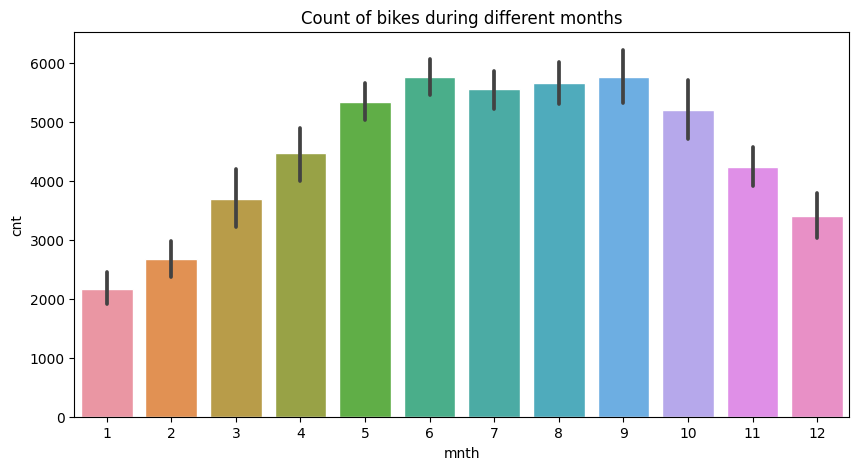

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

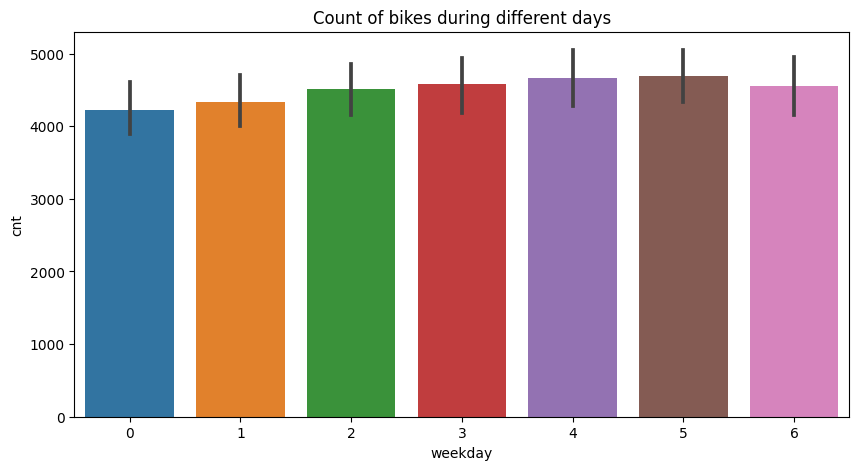

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

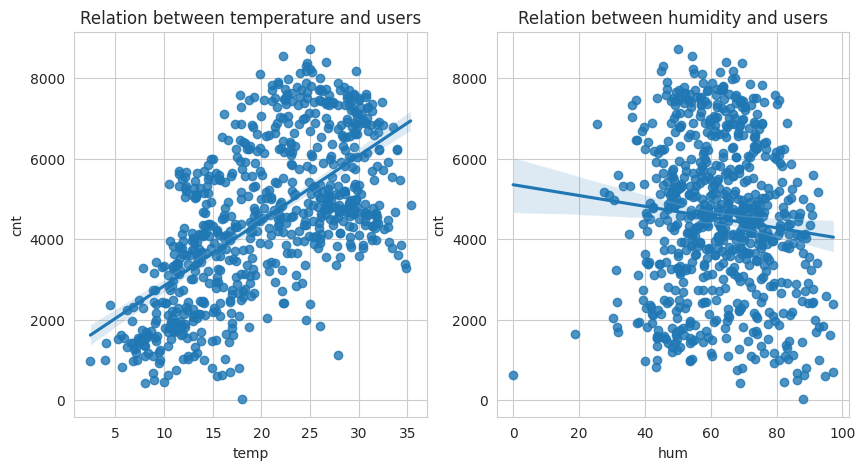

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

In [ ]:
#Removing Unwanted Columns such as instant, casual and registered
df.columns
df2 = df.drop(columns = ['dteday','instant', 'casual', 'registered'])

In [ ]:
bikenew = df2[[ 'holiday','workingday','temp', 'atemp', 'hum', 'windspeed','cnt']]
bikenew.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bikenew.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


We have identified an issue with humidity variables having a minimum value of zero, which is inherently illogical for humidity to be zero. As a solution, we will replace these zeros with more reasonable values to ensure data consistency and reliability.

In [ ]:
#get the count of the minimum value
min_value = bikenew[bikenew['hum']==0].shape[0]

min_value

1

In [ ]:
# Filter rows with the minimum value
min_value_rows = bikenew[bikenew['hum']==0]

min_value_rows

,holiday,workingday,temp,atemp,hum,windspeed,cnt
68,0,1,15.952731,19.2834,0.0,17.545759,623


In [ ]:
# Calculate the mean humidity for
mean_humidity = bikenew['hum'].mean()

# Replace 0 values in the 'hum' column with the calculated mean
bikenew['hum'] = bikenew['hum'].replace(0, mean_humidity)

# Check the minimum value in the 'humidity' column after replacing 0 values
bikenew['hum'].min()

<ipython-input-28-3e7bc5dfb9a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikenew['hum'] = bikenew['hum'].replace(0, mean_humidity)


18.7917

We found 1 instances of zero humidity readings and fill it with mean values.

we want to visualize a histogram and scatterplot of more than 2 numeric variables in a dataframe we can use a pairplot from seaborn, so that it makes it easier to see the relationship between variables

In [ ]:
#create new dataframe that consist numeric value
bikecor = df[['temp', 'atemp','hum','windspeed', 'cnt']]

bikecor.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


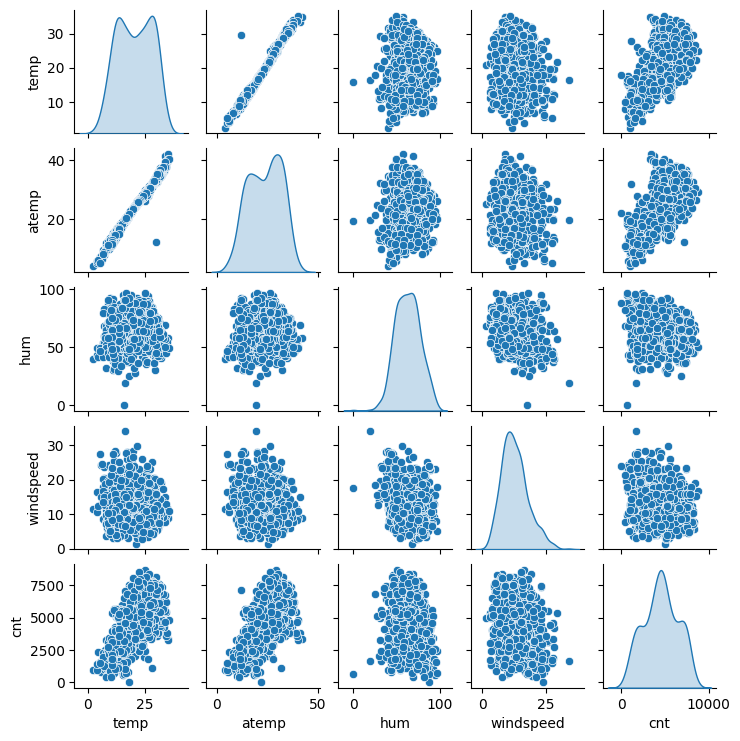

In [ ]:
sns.pairplot(bikecor, diag_kind='kde', height=1.5)
plt.show()

<Axes: >

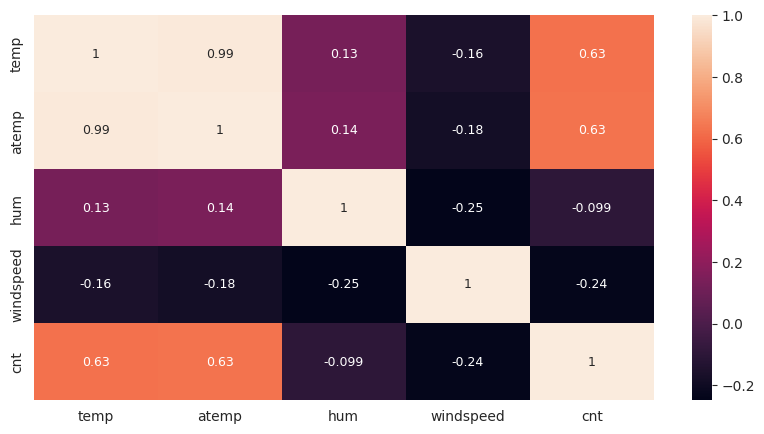

In [ ]:
corr = bikecor.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, annot_kws={'size':9})

variabel **rental of bike (cnt)** and **temp** have linear correlation

# **STATISTICAL TEST**

#### **Define Null & Alternate Hypothesis**

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: The bike's renting in working days and non- working days are equal.
$$ H_0:\mu_A = \mu_B $$

$H_1$: The bike's renting cnt in working days and non- working days are not equal.
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

In [ ]:
bikenew['workingday'] = bikenew['workingday'].astype('category')

<ipython-input-66-e5fed85eeaaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikenew['workingday'] = bikenew['workingday'].astype('category')


In [ ]:
bikenew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holiday     730 non-null    int64   
 1   workingday  730 non-null    category
 2   temp        730 non-null    float64 
 3   atemp       730 non-null    float64 
 4   hum         730 non-null    float64 
 5   windspeed   730 non-null    float64 
 6   cnt         730 non-null    int64   
dtypes: category(1), float64(4), int64(2)
memory usage: 35.2 KB


In [ ]:
bikenew.describe()

,holiday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,20.319259,23.726322,62.851155,12.763620,4508.006849
std,0.167266,7.506729,8.150308,14.046267,5.195841,1936.011647
min,0.000000,2.424346,3.953480,18.791700,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.052075,9.041650,3169.750000
50%,0.000000,20.465826,24.368225,62.708350,12.125325,4548.500000
75%,0.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [ ]:
bikenew.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bikenew.groupby('workingday')['cnt'].sum()

workingday
0    1000269
1    2290576
Name: cnt, dtype: int64

In [ ]:
# bike rent on weekdays
data_group1 = bikenew[bikenew['workingday']==1]['cnt'].values

# bike rent on weekend
data_group2 = bikenew[bikenew['workingday']==0]['cnt'].values

# variance
np.var(data_group1), np.var(data_group2)

(3513250.36227967, 4193053.0234440886)

In [ ]:
from scipy import stats
result = stats.ttest_ind(a = data_group1,
                         b = data_group2,
                         equal_var=False,
                         alternative = "greater")

In [ ]:
result.pvalue

0.05128856235031219

In [ ]:
result.statistic

1.6361086461224856

In [ ]:
# Menentukan aturan keputusan
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


# **Degree of freedom from two-samples**

In [ ]:
df_data = len(data_group1)+len(data_group2)-2
df_data

728

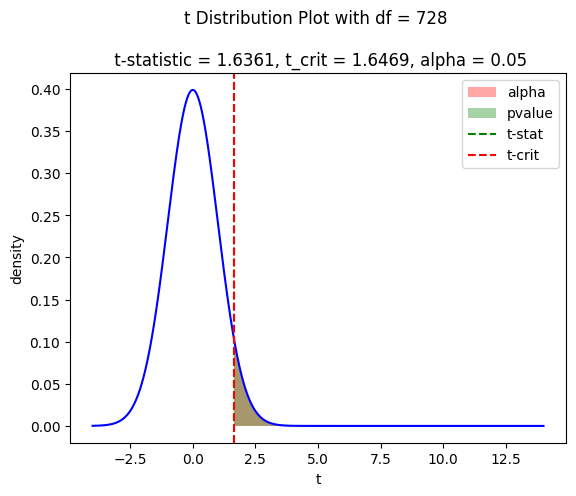

In [ ]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_group1),
                  d2 = DescrStatsW(data=data_group2))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -52.411639253124235 572.7393075767842 ]


Based on the result, we can 95% confident that the average difference the bike's renting in working days and non working days lies between -52.4 and 572.7

### Conclusion
- As the p value < alpha(0.05) , we failed to reject $H_0$. Therefore, we can say that the count of renting bikes in both working and non-working days is not equal.

- Confidence interval lies between -52 and 572

# **Regression Analysis**

In [ ]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

### Fit Linear Regression - Using a Continous Variable

In [ ]:
# Create OLS model object
model = smf.ols("cnt ~ temp", bikenew)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_bikenew = print_coef_std_err(results)

In [ ]:
results.rsquared

0.39571479965698186

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     471.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           5.07e-81
Time:                        09:11:07   Log-Likelihood:                -6377.9
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     728   BIC:                         1.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1222.0403    161.278      7.577      0.0

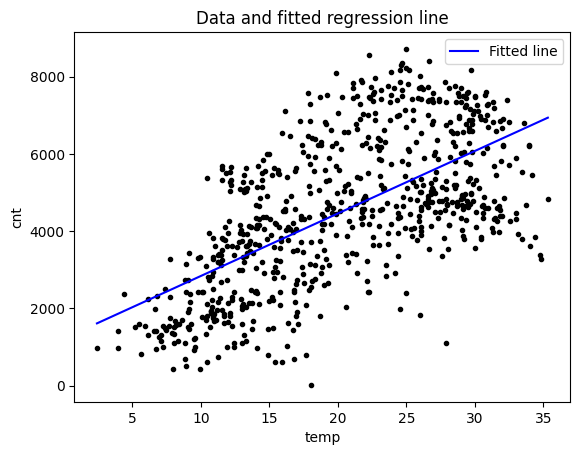

In [ ]:
predictor = "temp"
outcome = "cnt"
data = bikenew.copy()
results_ = results_bikenew.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("cnt")
plt.xlabel("temp")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [ ]:
results_bikenew

,coef,std err
Intercept,1222.040264,161.277589
temp,161.716850,7.445948


$$\text{cnt} = 1222 + 161.7\text{temp}$$

- The average bike rental when the temperature 0 is 1222. it doesn't make sense since no one will using bike due to unsupported environment.
- As a result, we can write another equivalent equation by using the average of Count of Rental bike  and Temperature

In [ ]:
np.mean(bikenew["cnt"])

4508.006849315068

In [ ]:
np.mean(bikenew["temp"])

20.319259216986303

$$\text{cnt} = 4508 + 161.7\text({temp}-20,3)$$

- So the interpretation would be, the average bike rentaled on the average temperature is `4508`

- Next, the interpretation of coefficient in temperature is, the difference in bike rental between temperature added one point different, is `162`.

### Fit Linear Regression - Using a Binary Variable

- Build the model using ols

In [ ]:
# Create OLS model object
model = smf.ols("cnt ~ workingday", bikenew)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_bikenew = print_coef_std_err(results)

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.859
Date:                Sun, 07 Jan 2024   Prob (F-statistic):             0.0913
Time:                        09:11:06   Log-Likelihood:                -6558.8
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4330.1688    127.218     34.037      0.0

- Visualize the data and the regression line

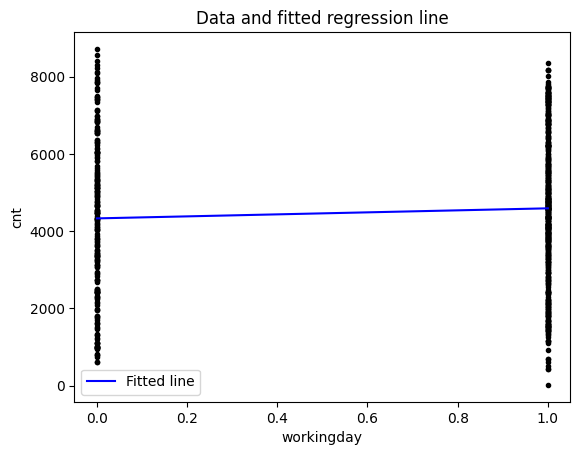

In [ ]:
predictor = "workingday"
outcome = "cnt"
data = bikenew.copy()
results_ = results_bikenew.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("cnt")
plt.xlabel("workingday")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation

- Now we read the result of the model, and interpret each coefficient

In [ ]:
results_bikenew

,coef,std err
Intercept,4330.168831,127.218134
workingday,260.163834,153.872205


$$\text{cnt} = 4330 + 260\text{workingday}$$

- The average bike rental when it's weekend nor holiday is 4330.
- Next, the interpretation of coefficient in workingday is, the difference in rental bike between workingday or weekend nor holiday have 260 higher rental bike on average

### Fit Linear Regression - Include Both Variables

In [ ]:
#multiple fit Regression
# Create OLS model object
model = smf.ols("cnt ~ temp + workingday", bikenew)

# Fit the model
resultsboth = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_bikenew = print_coef_std_err(results)

In [ ]:
print(resultsboth.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           8.34e-80
Time:                        12:57:26   Log-Likelihood:                -6377.4
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     727   BIC:                         1.277e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1147.4569    177.489     

### Coefficient Interpretation

In [ ]:
results_bikenew

,coef,std err
Intercept,1147.456924,177.489114
workingday[T.1],121.037237,120.270068
temp,161.315601,7.456549


$$\text{cnt} = 1147+ 161\text{temp} + 121\text{workingday}$$



*   The model predict rental bike when the temperature have 0 and when its weekend nor holiday is 1147.
*   The coefficient of maternal temperature : if we compare rental bike on the weekend nor holiday but differed one point on the temperature, the expected difference of total rental bike is 161.

*   The coefficient of maternal working day : if we compare average rental bike on the same temperature but differed in working days, the expected difference of rental bike is 121.






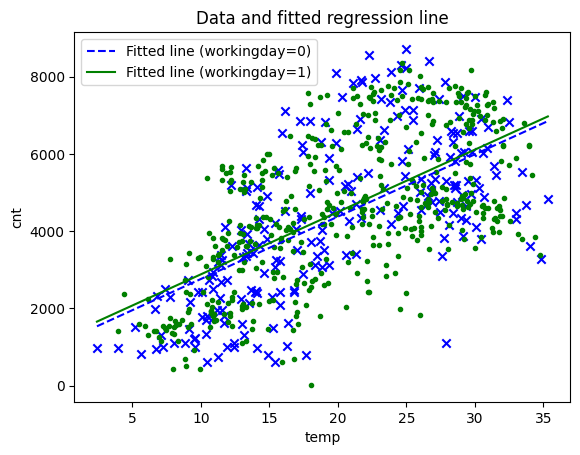

In [ ]:
predictors = ["temp","workingday"]
outcome = "cnt"
data = bikenew.copy()
results_ = results_bikenew.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i],
                marker = markers[i])

# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]


# y_hat = beta_0_hat + \beta_1_hat * mom_hs + \beta_2_hat * mom_iq
fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(2)]


# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (workingday={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Fit Linear Regression - Include an Interaction

In [ ]:
# Create OLS model object
model = smf.ols("cnt ~ temp + workingday + workingday:temp", bikenew)

# Fit the model
results_inter = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_bikenew_inter = print_coef_std_err(results)



*   Visualize the data


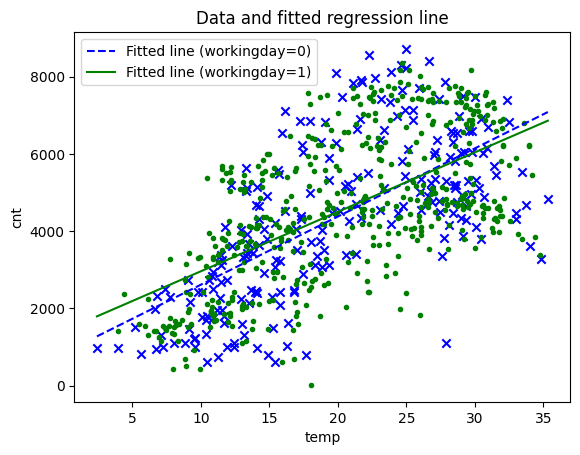

In [ ]:
predictors = ["temp","workingday","workingday:temp"]
outcome = "cnt"
data = bikenew.copy()
results_ = results_bikenew_inter.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (workingday={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

Coefficient Interpretation

In [ ]:
results_bikenew_inter

,coef,std err
Intercept,850.008364,274.092742
temp,176.391767,12.950115
workingday,572.133666,338.939353
workingday:temp,-22.537636,15.833697


$$\text{cnt} = 850 + 176\text{temp} + 572\text{workingday} - 22\text{workingday}*\text{temp}$$

$$\text{workingday}=0, \text{cnt} = 850 + \text{temp}$$

- The estimated difference between total rental bike on weekend nor holiday but differ 1 point in temperature is 850

$$\text{workingday}=1, \text{cnt} = 1422 + 154\text{temp}$$
- The estimated difference between total rental bike on workingday but differ 1 point in temperature is 154

In [ ]:
results.rsquared

0.39571479965698186

In [ ]:
print(results_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           5.29e-79
Time:                        12:55:39   Log-Likelihood:                -6376.4
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     726   BIC:                         1.278e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              850.0084 